- In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
- This will require you doing a lot of data preprocessing because
- the dataset isn't split into training and validation for you

In [16]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

## 1 - Data Preprocessing

In [17]:
path_cats_and_dogs = f'{getcwd()}/cats-and-dogs_full.zip'
shutil.rmtree('/tmp') # to delete directory specified; not entire path

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

1500
1500


In [19]:
directories = ['/tmp/cats-v-dogs/',
               '/tmp/cats-v-dogs/training',
               '/tmp/cats-v-dogs/testing', 
               '/tmp/cats-v-dogs/training/cats',
               '/tmp/cats-v-dogs/training/dogs',
               '/tmp/cats-v-dogs/testing/cats',
               '/tmp/cats-v-dogs/testing/dogs']

try:
    
    for dirs in directories:
        os.mkdir(dirs)
        print(dirs + ' created successfully!')
    
except OSError:
    pass

/tmp/cats-v-dogs/ created successfully!
/tmp/cats-v-dogs/training created successfully!
/tmp/cats-v-dogs/testing created successfully!
/tmp/cats-v-dogs/training/cats created successfully!
/tmp/cats-v-dogs/training/dogs created successfully!
/tmp/cats-v-dogs/testing/cats created successfully!
/tmp/cats-v-dogs/testing/dogs created successfully!


In [20]:
def split_data(source, training, testing, split_size):
    
    all_files = []
    for file_name in os.listdir(source):
        file_path = source + file_name
        
        # to make sure images is not zero file length
        if os.path.getsize(file_path)>0:
            all_files.append(file_name)
            
        else: 
            print('{} is zero length'.format(file_name))
            
    
    n_files = len(all_files)
    split_point = int(n_files * split_size)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(source + file_name, training + file_name)
    
    for file_name in test_set:
        copyfile(source + file_name, testing + file_name)

In [21]:
cat_source_dir = "/tmp/PetImages/Cat/"
train_cats_dir = "/tmp/cats-v-dogs/training/cats/"
test_cats_dir = "/tmp/cats-v-dogs/testing/cats/"
dog_source_dir = "/tmp/PetImages/Dog/"
train_dogs_dir = "/tmp/cats-v-dogs/training/dogs/"
test_dogs_dir = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(cat_source_dir, train_cats_dir, test_cats_dir, split_size)
split_data(dog_source_dir, train_dogs_dir, test_dogs_dir, split_size)

print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

1350
1350
150
150


## 2 - Model Building and Training

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
train_dir = '/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_dir = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150,150))

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [25]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 270 steps, validate for 30 steps
Epoch 1/3
270/270 [==============================] - 65s 241ms/step - loss: 0.6955 - accuracy: 0.5359 - val_loss: 0.6817 - val_accuracy: 0.5433
Epoch 2/3
270/270 [==============================] - 63s 232ms/step - loss: 0.6780 - accuracy: 0.6026 - val_loss: 0.6512 - val_accuracy: 0.6500
Epoch 3/3
270/270 [==============================] - 63s 234ms/step - loss: 0.6353 - accuracy: 0.6537 - val_loss: 0.6358 - val_accuracy: 0.6567


## 3 - Visualising Loss & Accuracy

Text(0.5, 1.0, 'Training and validation loss')

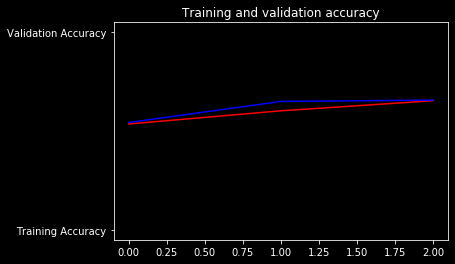

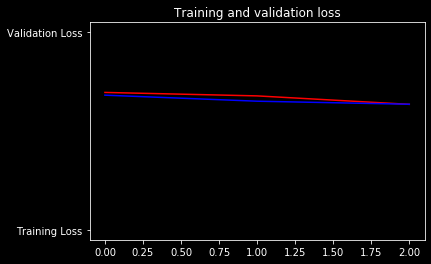

In [32]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
plt.style.use('dark_background')

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, acc, 'r', "Training Accuracy", label = 'Train Acc')
plt.plot(epochs, val_acc, 'b', "Validation Accuracy", label = 'Val Acc')
plt.title('Training and validation accuracy')


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'r', "Training Loss", label = 'Train Loss')
plt.plot(epochs, val_loss, 'b', "Validation Loss", label = 'Val Loss')
plt.title('Training and validation loss')